## E-Commerce Data Analysis

### Objective

The objective of this analysis is to answer the following questions:

1. What was the total revenue for all completed transactions?
2. What product had the highest revenue for all completed transactions ?
3. What country had the highest revenue for all completed transactions ?
4. What month had the highest revenue for all completed transactions ?
5. What month had the highest number of customers served for all completed transactions ?

In [22]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [23]:
#importing data
df = pd.read_csv(r"/kaggle/input/an-online-shop-business/Sales Transaction v.4a.csv", parse_dates = ['Date'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  object        
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  object        
 3   ProductName    536350 non-null  object        
 4   Price          536350 non-null  float64       
 5   Quantity       536350 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536350 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.7+ MB


In [25]:
#Creating total price column
df['Total Price'] = df['Price'] * df['Quantity']

#Subsetting dataset into completed transactions
completed = df[df['Quantity']>0]

#### 1. What was the total revenue for all completed transactions?

In [26]:
round(completed['Total Price'].sum(),2)

62965974.34

The total revenue for all completed transactions was 62,965,974.34 USD

#### 2. What product had the highest revenue for all completed transactions ?

In [27]:
completed.groupby('ProductName')['Total Price'].sum().sort_values(ascending = False).head()

ProductName
Paper Craft Little Birdie             1002718.10
Medium Ceramic Top Storage Jar         881990.18
Popcorn Holder                         587433.94
World War 2 Gliders Asstd Designs      569735.39
Cream Hanging Heart T-Light Holder     484592.69
Name: Total Price, dtype: float64

In [28]:
completed.groupby('ProductName')['Total Price'].sum().sort_values().head()

ProductName
Set 10 Cards Snowy Robin 17099      6.19
Crochet Lilac/Red Bear Keyring      6.19
Hen House W Chick In Nest          10.68
Pink Crystal Guitar Phone Charm    11.12
Wire Flower T-Light Holder         11.53
Name: Total Price, dtype: float64

The product with the highest revenue is the Paper Craft Little Birdie with a revenue of 1,002,718.10 USD and the prodcuts with the least revenue is Set 10 Cards Snowy Robin 17099 and Crochet Lilac/Red Bear Keyring with a revenue of 6.19 USD.

#### 3. What country had the highest revenue for all completed transactions ?

In [29]:
#Finding the countries with the most revenue
top_10_country_revenue = completed.groupby('Country')['Total Price'].sum().sort_values( ascending = False).head(10)
top_10_country_revenue

Country
United Kingdom    52524658.47
Netherlands        2151553.59
EIRE               1713410.95
Germany            1371543.27
France             1330652.89
Australia           995607.91
Sweden              401879.89
Switzerland         361969.25
Japan               293155.44
Spain               281012.27
Name: Total Price, dtype: float64

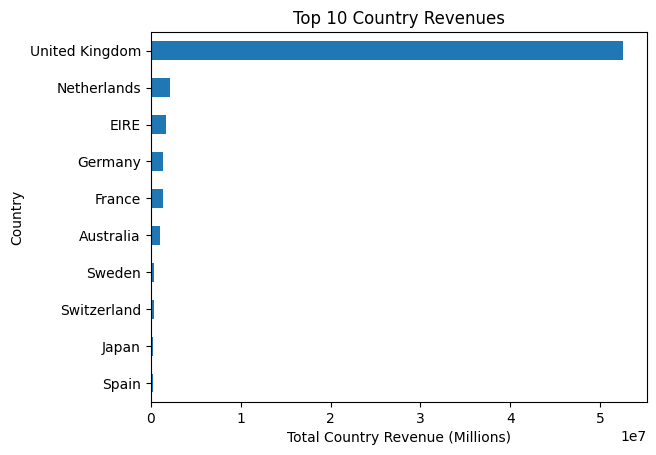

In [30]:
#Plotting the top 10 countries with the most revenue
top_10_country_revenue.sort_values().plot(kind = 'barh', title = 'Top 10 Country Revenues', xlabel = 'Total Country Revenue (Millions)')
plt.show()

The United Kingdom was the country with the highest revenue,totaling more than 5 Million USD.

#### 4. What month had the highest revenue for all completed transactions ?

In [31]:
# Creating a Month-Year column
completed['Year-Month'] = completed['Date'].dt.strftime("%Y-%m")

#Finding revenue per month
MoM_Change = completed.groupby('Year-Month')['Total Price'].sum().reset_index()

#Finding MoM Change Integer
MoM_Change['MoM_Change_Int'] = MoM_Change['Total Price'].diff().fillna(0)

#Finding MoM Change Percent
MoM_Change['MoM_Change_Pct'] = round(MoM_Change['Total Price'].pct_change(),2).fillna(0)

#Renaming column
MoM_Change.rename(columns = {'Total Price': 'Month Revenue'}, inplace = True)

MoM_Change

/tmp/ipykernel_42/39934607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed['Year-Month'] = completed['Date'].dt.strftime("%Y-%m")


,Year-Month,Month Revenue,MoM_Change_Int,MoM_Change_Pct
0,2018-12,4415415.52,0.00,0.00
1,2019-01,4559856.37,144440.85,0.03
2,2019-02,3335017.18,-1224839.19,-0.27
3,2019-03,4398401.60,1063384.42,0.32
4,2019-04,3589497.88,-808903.72,-0.18
5,2019-05,4578965.08,989467.20,0.28
6,2019-06,4494730.81,-84234.27,-0.02
7,2019-07,4593867.06,99136.25,0.02
8,2019-08,4758356.02,164488.96,0.04
9,2019-09,6628303.06,1869947.04,0.39


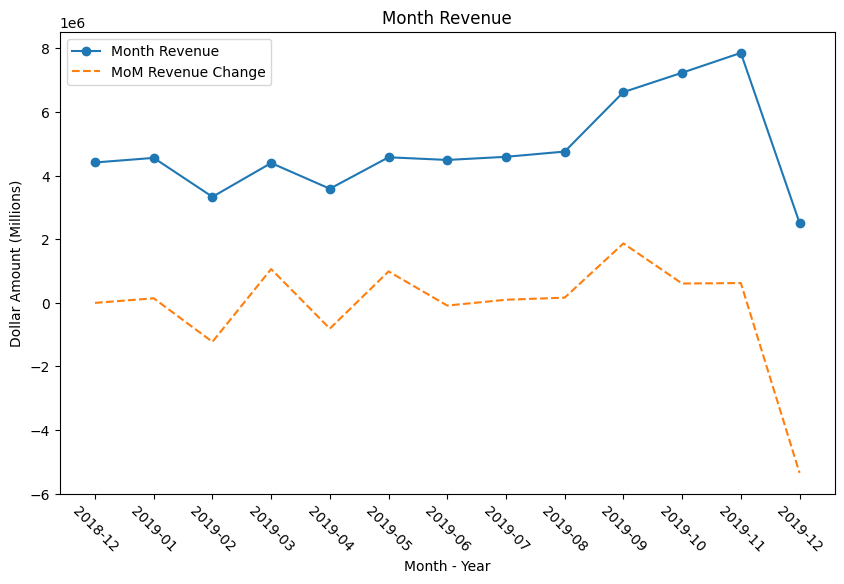

In [32]:
#Visualizing MoM Total Price and MoM Change Data

plt.figure(figsize = (10,6))

#Plotting Data
plt.plot(MoM_Change['Year-Month'],MoM_Change['Month Revenue'], label = 'Month Revenue', marker = 'o' )
plt.plot(MoM_Change['Year-Month'],MoM_Change['MoM_Change_Int'], linestyle = '--', label = 'MoM Revenue Change' )

#Labels
plt.xticks(rotation = -45)
plt.xlabel ('Month - Year')
plt.ylabel('Dollar Amount (Millions)')
plt.title('Month Revenue')
plt.legend()
plt.show()



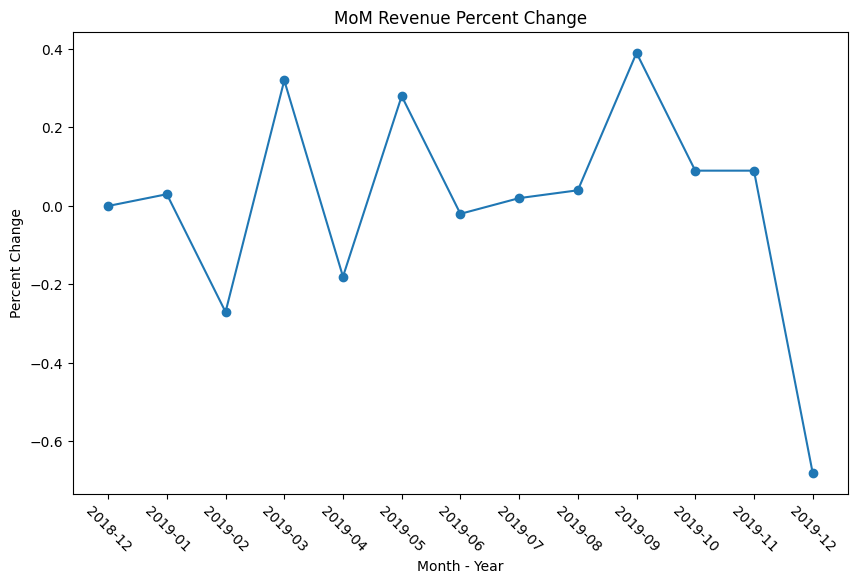

In [33]:
#Visualizing data

#Figsize
plt.figure(figsize = (10,6))

#Plotting data 
plt.plot(MoM_Change['Year-Month'],MoM_Change['MoM_Change_Pct'], marker = 'o')

#Labeling
plt.xticks(rotation = -45)
plt.xlabel ('Month - Year')
plt.ylabel('Percent Change')
plt.title('MoM Revenue Percent Change')

#Displaying data
plt.show()

In [34]:
#Month with the lowest revenue
MoM_Change.sort_values(by = 'Month Revenue').head(1)

,Year-Month,Month Revenue,MoM_Change_Int,MoM_Change_Pct
12,2019-12,2514949.28,-5346247.84,-0.68


In [35]:
#Month with the greatest revenue
MoM_Change.sort_values(by = 'Month Revenue', ascending = False).head(1)

,Year-Month,Month Revenue,MoM_Change_Int,MoM_Change_Pct
11,2019-11,7861197.12,623779.76,0.09


In [36]:
#Month with the greatest MoM Revenue Increase
MoM_Change.sort_values(by = 'MoM_Change_Int', ascending = False).head(1)

,Year-Month,Month Revenue,MoM_Change_Int,MoM_Change_Pct
9,2019-09,6628303.06,1869947.04,0.39


In [37]:
#Month with the greatest MoM Revenue Percentage Increase
MoM_Change.sort_values(by = 'MoM_Change_Pct', ascending = False).head(1)

,Year-Month,Month Revenue,MoM_Change_Int,MoM_Change_Pct
9,2019-09,6628303.06,1869947.04,0.39


In [38]:
#MoM Trend
round(MoM_Change[['MoM_Change_Int','MoM_Change_Pct']].mean(),2)

MoM_Change_Int   -146189.71
MoM_Change_Pct         0.01
dtype: float64

November 2019 was the month with the greatest revenue. December 2019 was the month with the lowest monthly revenue. On average, there was a doward trend in monthly revenue in the dataset in which there was a 146,189.71 USD, or 1% decrease in MoM revenue. Additionally, September 2019 was the month with the largest MoM Revenue and MoM Revenue Percentage increase of 1,869,947.04 USD or a 39% increase.

#### 5. What month had the highest number of customers served for all completed transactions ?

In [39]:
#Creating dataframe for MoM Customer Change
MoM_Customer_Change = completed.groupby('Year-Month')['CustomerNo'].count().reset_index()

#Renaming column
MoM_Customer_Change.rename(columns = {'CustomerNo':'Customer_Count'}, inplace = True)

#Finding interger value for MoM Customer Change
MoM_Customer_Change['MoM_Customer_Change_Int'] = MoM_Customer_Change['Customer_Count'].diff().fillna(0)
MoM_Customer_Change['MoM_Customer_Change_Int'] = MoM_Customer_Change['MoM_Customer_Change_Int'].astype('int32')

#Finding percentage value for MoM Customer Change
MoM_Customer_Change['MoM_Customer_Change_Pct'] = round(MoM_Customer_Change['Customer_Count'].pct_change().fillna(0),2)

In [51]:
#Creating dataframe for MoM Unique Customer Change
MoM_Unique_Customer_Change = completed.groupby('Year-Month')['CustomerNo'].nunique().reset_index()
MoM_Unique_Customer_Change.rename(columns = {'CustomerNo': 'Unique_Customer_Count'}, inplace = True)

#MoM Unique Customer Change
MoM_Unique_Customer_Change['MoM_Unique_Customer_Change_Int'] = MoM_Unique_Customer_Change['Unique_Customer_Count'].diff().fillna(0)
MoM_Unique_Customer_Change['MoM_Unique_Customer_Change_Int'] = MoM_Unique_Customer_Change['MoM_Unique_Customer_Change_Int'].astype('int32')

#MoM Unique Customer Pct Change
MoM_Unique_Customer_Change['MoM_Unique_Customer_Change_Pct'] = round(MoM_Unique_Customer_Change['Unique_Customer_Count'].pct_change().fillna(0),2)


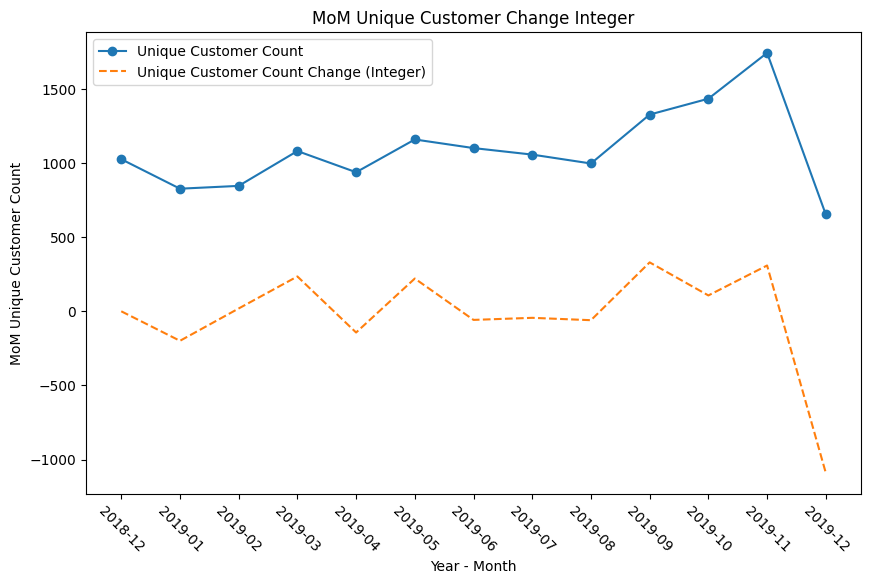

In [61]:
#Visualizing MoM Unique Customer Integer Change data

#figsize
plt.figure(figsize = (10,6))

#Plotting data
plt.plot(MoM_Unique_Customer_Change['Year-Month'],MoM_Unique_Customer_Change['Unique_Customer_Count'], marker = 'o', label = 'Unique Customer Count')
plt.plot(MoM_Unique_Customer_Change['Year-Month'],MoM_Unique_Customer_Change['MoM_Unique_Customer_Change_Int'],linestyle = '--', label = 'Unique Customer Count Change (Integer)')

#Labels
plt.xlabel('Year - Month')
plt.xticks(rotation = -45)
plt.ylabel('MoM Unique Customer Count')
plt.title('MoM Unique Customer Change Integer')
plt.legend()
plt.show()

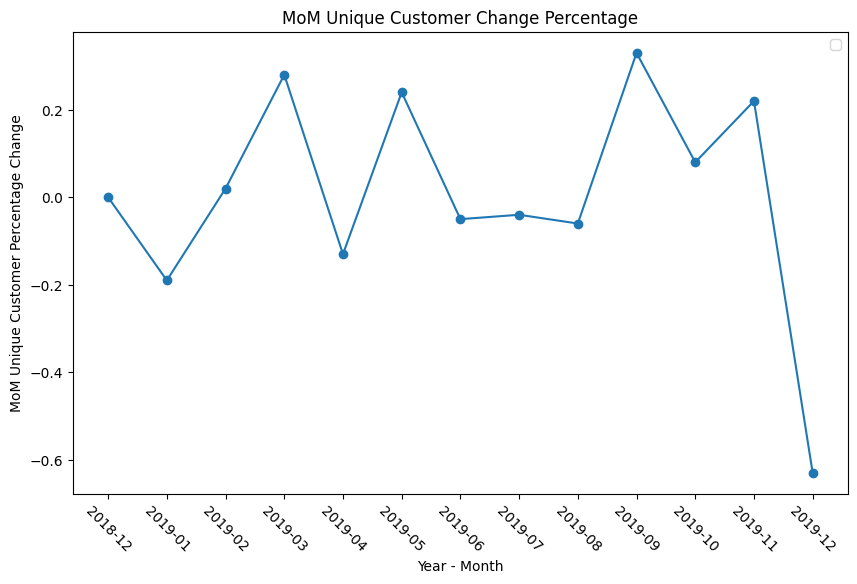

In [62]:
#Visualizing MoM Unique Customer Percentage Change data

#figsize
plt.figure(figsize = (10,6))

#Plotting data
plt.plot(MoM_Unique_Customer_Change['Year-Month'],MoM_Unique_Customer_Change['MoM_Unique_Customer_Change_Pct'], marker = 'o')


#Labels
plt.xlabel('Year - Month')
plt.xticks(rotation = -45)
plt.ylabel('MoM Unique Customer Percentage Change')
plt.title('MoM Unique Customer Change Percentage')
plt.legend()
plt.show()

In [44]:
#MoM Unique Customer Trend
round(MoM_Unique_Customer_Change[['MoM_Unique_Customer_Change_Int','MoM_Unique_Customer_Change_Pct']].mean(),2)

MoM_Unique_Customer_Change_Int   -28.69
MoM_Unique_Customer_Change_Pct     0.01
dtype: float64

In [46]:
# Month with greatest unique customers
MoM_Unique_Customer_Change.sort_values(by = 'Unique_Customer_Count', ascending = False).head(1)

,Year-Month,Unique_Customer_Count,MoM_Unique_Customer_Change_Int,MoM_Unique_Customer_Change_Pct
11,2019-11,1743,309.0,0.22


In [47]:
# Month with the least unique customers
MoM_Unique_Customer_Change.sort_values(by = 'Unique_Customer_Count').head(1)

,Year-Month,Unique_Customer_Count,MoM_Unique_Customer_Change_Int,MoM_Unique_Customer_Change_Pct
12,2019-12,653,-1090.0,-0.63


In [50]:
# Month with the greatest unique customers increase
MoM_Unique_Customer_Change.sort_values(by = 'MoM_Unique_Customer_Change_Int', ascending = False).head(1)

,Year-Month,Unique_Customer_Count,MoM_Unique_Customer_Change_Int,MoM_Unique_Customer_Change_Pct
9,2019-09,1327,330.0,0.33


November 2019 was the month with the greatest number of unique customers. December 2019 was the month with the lowest number of unique customers. On average, there was a doward trend in the number of unique customers, a decrease of approximately 29 unique customers, 1%, MoM. Additionally, September 2019 was the month with the largest MoM unqiue customer increase, 330 unique customers, 33%, MoM.

### Conclusion

There is a downward trend in the overall data in the E-Commerce dataset, sales, customers served, as well as unique customers served all spike in November 2019 and fall in December 2019. Despite this, 62,965,974.34 USD of revenue was generated with the most highest revenue generating product being the Paper Craft Little Birdie. Lastly, the United Kingdom was the country with the highest revenue.